# Tópico 4 - Aprendizado Supervisionado: Classificação

Nesta aula vamos estudar o uso de algoritmos de **Aprendizado de Máquina Supervisionado**. Focaremos nos algoritmos utilizados para **classificação**, que é a tarefa de predizer classes (rótulos categóricos) para conjuntos de dados (numéricos ou transformados em numéricos).

Existem muitos algoritmos para se realizar essa tarefa, entre eles:
- Regressão Logística
- Análise de Discriminante Linear (LDA)
- Análise de Discriminante Quadrático (QDA)
- Naive Bayes
- k-vizinhos mais próximos (KNN)
- Máquina de Vetor Suporte (SVM)
- Árvore de Decisão
- RandomForest

Cada uma dessas técnicas tem uma forte base matemática e conceitual. Os algoritmos foram propostos ao longo de diversas décadas e possuem diferentes cenários de aplicações

--------------------------

## Exemplo 1 - Botânica: Íris Dataset

Esse dataset contém medidas da largura e comprimento da pétala e da sépala de **150 amostras** de flores, assim como a espécie de cada uma (*versicolor*, *setosa*, *virginica*). Mais informações: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html.

<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png" alt="dieta" width="600px">

### Exemplo 1 - Primeiro passo: Análise Exploratória

In [1]:
from sklearn import datasets # Para carregar dataset pronto no scikit-learn
import pandas as pd # Para trabalhar com dados em tabelas

# Para trabalhar com gráficos
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
# Carregando os dados
# Estamos carregando os dados do próprio scikitlearn
iris = datasets.load_iris()

dados = pd.DataFrame(data=iris.data,  # Estamos dizendo que o dados do dataframe são o atributo data do objeto iris
                     columns = iris.feature_names) # Já o nome das colunas do dataframe serão o atrib feature_names

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
# Aqui estamos criando uma funcao que recebe o número da classe e retorna o nome correspondente
def mapear_nomes(numero_classe):
    return(iris.target_names[numero_classe])

In [5]:
dados['flower'] = iris.target
dados['flower_name'] = dados['flower'].apply(mapear_nomes)

In [6]:
dados.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


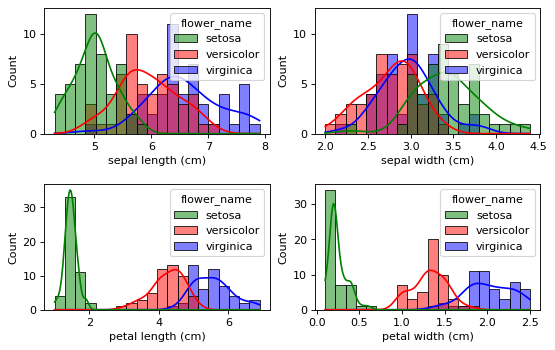

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(8, 5), dpi=80)

sns.histplot(ax=axes[0][0],
            data=dados,  # Perceba que estamos passando a coluna o dataframe completo
            x = dados['sepal length (cm)'], # E aqui estamos selecionando a coluna
            kde=True,
            bins=20,
            linewidth=0.7,
            hue = dados['flower_name'],
            palette=["g", "r", "b"]
            )

sns.histplot(ax=axes[0][1],
            data=dados,
            palette=["g", "r", "b"],
            x = dados['sepal width (cm)'],
            kde=True,
            bins=20,
            linewidth=0.7,
            hue = dados['flower_name']
            )

sns.histplot(ax=axes[1][0],
            data=dados,  # Perceba que estamos passando a coluna o dataframe completo
            x = dados['petal length (cm)'], # E aqui estamos selecionando a coluna
            kde=True,
            bins=20,
            linewidth=0.7,
            hue = dados['flower_name'],
            palette=["g", "r", "b"]
            )

sns.histplot(ax=axes[1][1],
            data=dados,
            palette=["g", "r", "b"],
            x = dados['petal width (cm)'],
            kde=True,
            bins=20,
            linewidth=0.7,
            hue = dados['flower_name']
            )

plt.subplots_adjust(wspace=0.2, hspace=0.4)

### Exemplo 1 - Segundo passo: separar os dados

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Escolhendo as colunas preditivas e alvo
x = dados.drop(columns = ['flower', 'flower_name']) # Somente Comprimento do Abdômen e Comprimento das Antenas
y = dados['flower_name'] # Classe alvo

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 8, stratify=y)
# O stratify mantem a mesma proporção de exemplos para cada classe

### Exemplo 1 - Terceiro passo: transformar os dados 

Para mais informações sobre tipos de escalonamento, consulte:
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [11]:
# Instanciando o Escalonador
scaler = StandardScaler()
#scaler = MinMaxScaler()

# Treinando o escalonador
scaler.fit(x_train)

# Usando o escalonador treinado para transformar os dados
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Exemplo 1 - Quarto passo: treinar o algoritmo 

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier()  # Criamos o objeto do classificador (não mudamos nenhum hiperpârametro)

knn.fit(x_train_scaled, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

KNeighborsClassifier()

### Exemplo 1 - Quinto passo: testar e avaliar 

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix,classification_report
from sklearn.metrics import cohen_kappa_score, roc_auc_score, roc_curve

In [15]:
# Perceba que estamos passando apenas o x de teste, afinal o algoritmo é que nos dira qual é o y 
y_predicoes = knn.predict(x_test_scaled) 

<Figure size 1080x360 with 0 Axes>

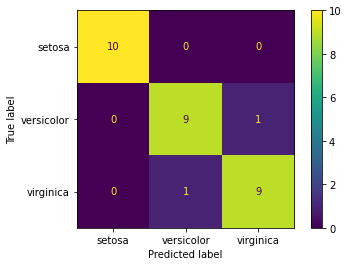

In [16]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes,
                                   labels=iris.target_names)

# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=iris.target_names)
disp.plot(values_format='d') 

In [17]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [18]:
# Métrica do Coeficiente Kappa de Cohen
cohen_kappa_score(y_test, y_predicoes)

0.9

### Exemplo 1 - Retornando ao quarto passo para fazer o ajuste de hiperparâmetros

Dessa vez, não iremos apenas usar o algoritmo KNN, iremos ajustar os hiperpametros para encontrar aqueles que performam melhor para a tarefa.

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
import numpy as np

Vamos observar o que acontece com o erro conforme aumentamos o número de vizinhos:

In [20]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled, y_train)
    pred_i = knn.predict(x_test_scaled)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

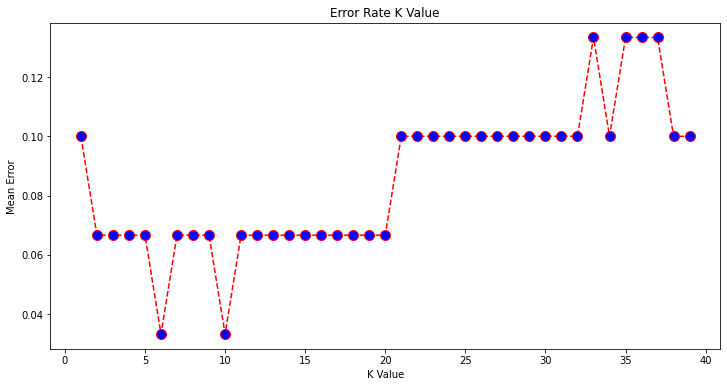

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [22]:
# Buscar os melhores parâmetros
# Vamos usar uma técnica chamada Gridsearch que é basicamente a busca por força bruta
# Iremos utilizar a técnica de validação cruzada de 5 folds (divisões) em cima do conjunto de treinamento
# Como métrica de melhor desemepnho usaremos a acurácia, isto é,
# estamos buscando os hiperparâmetros que maximizam a acurácia

# Parâmetros testados
param_grid = {'n_neighbors':[3,5,11,19,25],
              'weights': ['uniform', 'distance'],
              'metric':['cosine', 'euclidean', 'manhattan']
             }

# Métrica de desempenho = melhor acurácia
gs_metric = make_scorer(accuracy_score, greater_is_better=True)

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, scoring=gs_metric, cv=5, n_jobs=6, verbose=3)
grid.fit(x_train_scaled, y_train)
knn_params = grid.best_params_
print('KNN', knn_params)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
KNN {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}


### Fazendo os pasos 4 e 5 com os melhores valores de hiperparâmetros

In [23]:
# Criamos o objeto do classificador usando os hiperparâmetros encontrados
knn = KNeighborsClassifier(metric = 'euclidean',
                          n_neighbors = 5, # Perceba que quando olhamos o k variando, k=6 deu melhor
                          weights = 'uniform')  

# Treinamos o classificador passando apenas o conjunto de dados de treinamento
knn.fit(x_train_scaled, y_train) 

# Fazendo as predições
y_predicoes = knn.predict(x_test_scaled) 

<Figure size 1080x360 with 0 Axes>

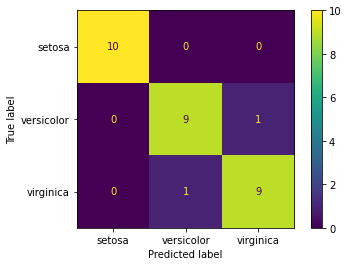

In [24]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes,
                                   labels=iris.target_names)

# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=iris.target_names)
disp.plot(values_format='d') 

In [25]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [26]:
# Métrica do Coeficiente Kappa de Cohen
cohen_kappa_score(y_test, y_predicoes)

0.9

------------------
## <font color='red'> Atenção</fonte>:

A seguir são apresentados dois datasets de pessoas reais. 

Ao se trabalhar com dados de pessoas devemos considerar a origem e os preceitos **bioéticos** envolvidos em sua coleta, construção e utilização. 

Além disso, é boa prática que os dados estejam anonimizados. 

----------------------
## Exercício 1 - Diagnóstico médico: Problemas Ortopédicos na Coluna Vertebral

Esse dataset contém dados sobre problemas ortopédicos na coluna vertebral, diagnosticados no Centre Médico-Chirurgical de Réadaptation des Massues, em Lyon, France. Contém 6 atributos biomecânicos para 310 entradas anonimizadas, sendo 100 de pacientes considerados sem problemas (Normal - NO), 60 de pacientes com Hérnia de Disco (Disk Hernia - DH) e 150 de pacientes com Espondilolistese (Spondylolisthesis - SL). 

O dataset está disponível em https://www.openml.org/d/1523


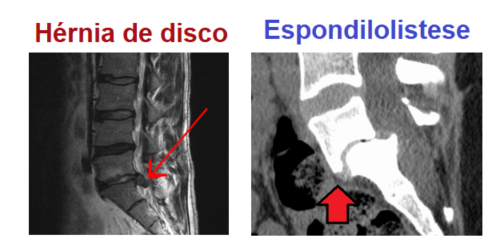

### Exercício 1 - Primeiro passo: Carregar dados e Realizar a Análise Exploratória

Para importar dados do OpenML podemos usar uma função pronta na biblioteca do Scikit-Learn:

In [27]:
from sklearn.datasets import fetch_openml

In [28]:
dados = fetch_openml(data_id=1523)

Perceba que o tipo do dado continua sendo um objeto Bunch, como vimos na aula 15.

In [29]:
type(dados)

sklearn.utils.Bunch

Agora que temos os dados carregamos em memória, podemos transformá-lo em um Dataframe do pandas:

In [30]:
import pandas as pd

In [31]:
df = pd.DataFrame(dados.data,columns=dados.feature_names) 

In [32]:
df.head()

,V1,V2,V3,V4,V5,V6
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985136,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


Vamos adicionar a coluna de target na frente.

Perceba, entretanto, que o atributo target_names do Bunch dados não nos é útil. Vamos precisar encontrar o diagnóstico representado por cada número de outra forma. Por sorte, temos a informação de quantas entradas são para cada classe e podemos usar isso para mapear os nomes corretos: 

In [33]:
dados.target_names

['Class']

In [34]:
list(dados.target).count('1')

60

In [35]:
list(dados.target).count('2')

100

In [36]:
list(dados.target).count('3')

150

In [37]:
target_map={
    '1':'Disk Hernia',
    '2':'Normal',
    '3':'Spondylolisthesis'
}   

In [38]:
df['diagnostic'] = [target_map[target] for target in dados.target]

In [39]:
df.head(3)

,V1,V2,V3,V4,V5,V6,diagnostic
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Disk Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Disk Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985136,-3.530317,Disk Hernia


Vamos gerar algumas estatísticas e visualizações exploratórias dos dados:

In [40]:
import seaborn as sns

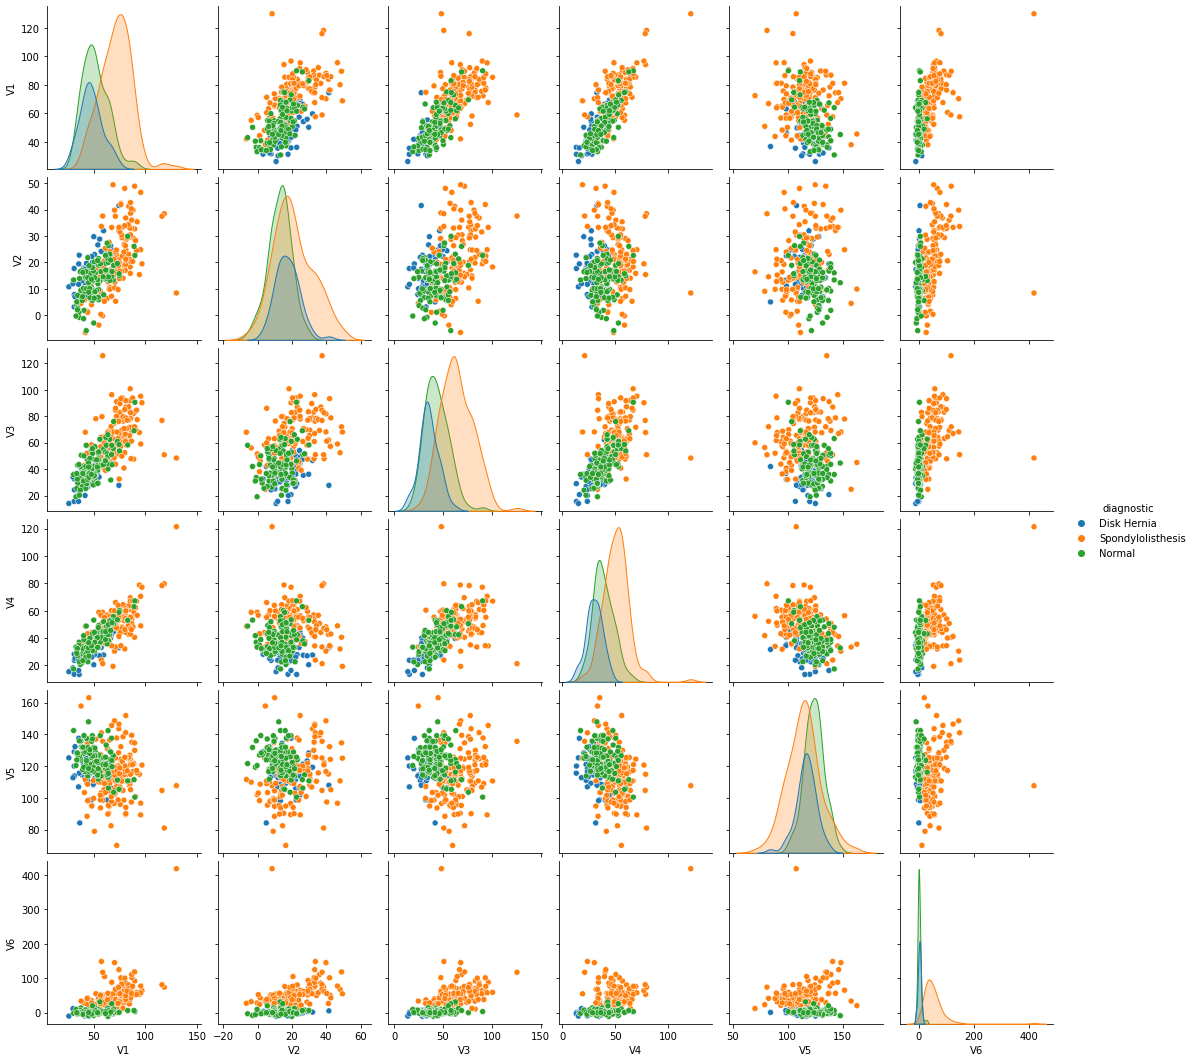

In [41]:
sns.pairplot(df, hue='diagnostic')

In [42]:
df.groupby('diagnostic').mean()

,V1,V2,V3,V4,V5,V6
diagnostic,,,,,,
Disk Hernia,47.638407,17.398795,35.463524,30.239612,116.474968,2.480251
Normal,51.685244,12.821414,43.542605,38.863830,123.890834,2.186572
Spondylolisthesis,71.514224,20.748038,64.110108,50.766186,114.518810,51.896687


In [43]:
df.groupby('diagnostic').std()

,V1,V2,V3,V4,V5,V6
diagnostic,,,,,,
Disk Hernia,10.697131,7.016708,9.767795,7.555388,9.355720,5.531177
Normal,12.368161,6.778503,12.361388,9.624004,9.014246,6.307483
Spondylolisthesis,15.109337,11.506169,16.397068,12.318813,15.579995,40.108030


### agora é com você ... 

Faça um classificador que prediz qual é o tipo de doença baseado nos biomarcadores levantados.

In [44]:
# Coloque aqui o seu código

----------------------
## Exercício 2 - Diagnóstico médico: Diabetes no povo Pima

Esse dataset contém dados sobre incidência de diabetes em mulheres do Povo Pima (índios nativos norte americanos originários do atual Estado do Arizona). Contém 8 atributos biomédicos para 768 entradas anonimizadas, sendo 500 testados negativo para diabetes e 268 testados positivo para diabetes.

O dataset está disponível em https://www.openml.org/d/37.

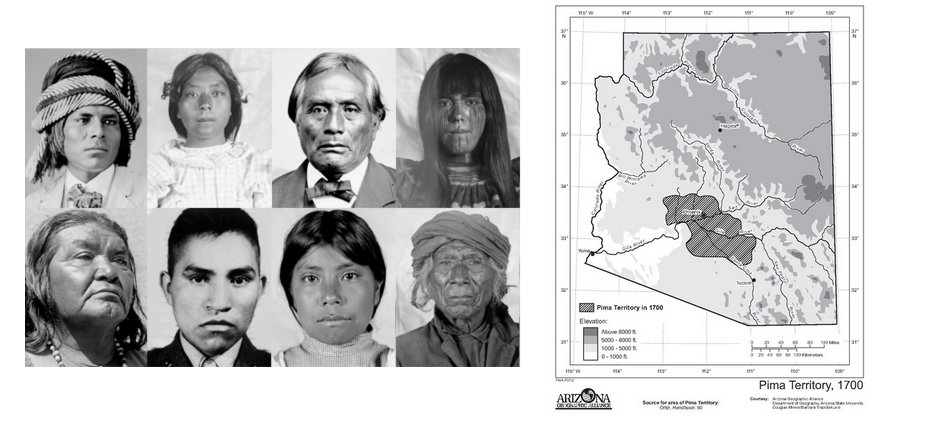

São 8 atributos mais a classe (onde 1 significa que testou positivo para diabetes):
- **preg** Number of times pregnant
- **plas** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **pres** Diastolic blood pressure (mm Hg)
- **skin** Triceps skin fold thickness (mm)
- **insu** 2-Hour serum insulin (mu U/mL)
- **mass** Body mass index (weight in kg/ height in m²)
- **pedi** Diabetes pedigree function
- **age** Age (years)
- **Class** variable (0 or 1)

### Exercício 2.1: Faça análise exploratória dos dados

In [45]:
## Coloque seu código aqui

### Exercício 2.2: Crie um classificador que prediz se uma determinada mulher tem ou não um diagnostico positivo para diabetes. Qual foi o melhor modelo (em acurácia) que você conseguiur criar?

In [46]:
## Coloque seu código aqui